# Code Goes Here

In [1]:
print("Hello dunia")

Hello dunia


In [ ]:
# imports
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# read npt-HK4.gro file
def read_gro_file(filename):
    with open(filename, "r") as f:
        # read title line
        title = f.readline().strip()

        # Read number of atoms
        num_atoms = int(f.readline().strip())

        atoms_data = []
        previous_atom_id = 0
        for _ in range(num_atoms):
            line = f.readline().rstrip()

            # Parsing info
            res_id = int(line[0:5])
            res_name = line[5:8].strip()
            atom_name = line[12:15].strip()

            atom_id = int(line[15:20].strip())
            # Problem: after atom id 99999, it reverts back to 0. The following solves this:
            if previous_atom_id >= 99999:
                atom_id = previous_atom_id + 1
            previous_atom_id = atom_id

            x = float(line[20:28].strip())
            y = float(line[28:36].strip())
            z = float(line[36:44].strip())

            atoms_data.append(
                {
                    "res_id": res_id,
                    "res_name": res_name,
                    "atom_name": atom_name,
                    "atom_id": atom_id,
                    "x": x,
                    "y": y,
                    "z": z,
                }
            )

        # Read box dimensions
        box_line = f.readline().strip().split()

        box_x = float(box_line[0])
        box_y = float(box_line[1])
        box_z = float(box_line[2])

    return title, num_atoms, atoms_data, (box_x, box_y, box_z)


title, num_atoms, atoms, box = read_gro_file(
    "C:/Users/user/OneDrive/Documents/intern-stuff/git/kmc-charge-transport-organic-semiconductor/data/npt-HK4.gro"
)

print(f"Title: {title}")
print(f"Number of atoms: {num_atoms}")
print(f"99999th atom: {atoms[99998]}")
print(f"10000th atom: {atoms[99999]}")
print(f"10001th atom: {atoms[100000]}")
print(f"Box Dimensions: {box}")

Title: mol only system in water
Number of atoms: 126084
99999th atom: {'res_id': 1191, 'res_name': 'HK4', 'atom_name': 'C13', 'atom_id': 99999, 'x': 1.262, 'y': 5.595, 'z': 5.683}
10000th atom: {'res_id': 1191, 'res_name': 'HK4', 'atom_name': 'H6', 'atom_id': 100000, 'x': 1.329, 'y': 5.673, 'z': 5.723}
10001th atom: {'res_id': 1191, 'res_name': 'HK4', 'atom_name': 'C7', 'atom_id': 100001, 'x': 1.056, 'y': 5.248, 'z': 5.556}
Box Dimensions: (11.24798, 11.24798, 11.24798)


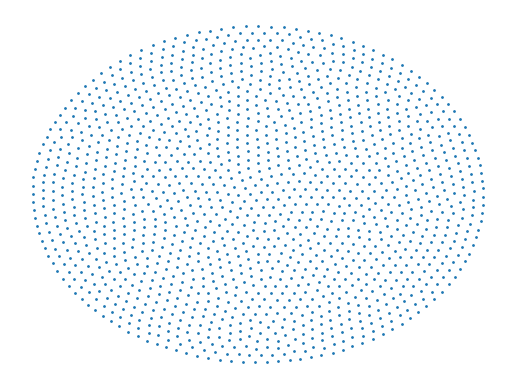

In [7]:
# Creating nodes
G = nx.Graph()

unique_res_id = set(d["res_id"] for d in atoms)
# print(unique_res_id)

G.add_nodes_from(unique_res_id)


subax1 = plt.subplot(111)
nx.draw(G, with_labels=False, font_weight="bold", node_size = 1)
plt.show()